# Obesity Predictor

### Ideathon 2024 - Andy Phan

***
## Task 1: SEE THE BIG PICTURE

In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(3)

data = pd.read_excel("Obesity_Dataset.xlsx", engine="openpyxl")

#1. Size of the dataset (in MB)
size_in_mb = data.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Dataset Size: {size_in_mb:.2f} MB")

#2. Number of entries (rows)
num_entries = data.shape[0]
print(f"Number of entries: {num_entries}")

#3. Number of features (columns)
num_features = data.shape[1]
print(f"Number of features: {num_features}")

Dataset Size: 0.18 MB
Number of entries: 1610
Number of features: 15


In [ ]:
data.head(20)

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2
5,2,18,176,1,1,1,1,4,2,2,2,4,3,4,2
6,2,19,152,2,2,3,1,1,2,3,2,2,3,2,2
7,2,19,158,2,2,3,2,4,2,1,1,1,3,3,2
8,2,19,159,2,2,2,2,2,2,1,2,2,3,4,2
9,2,19,162,2,2,2,2,2,2,2,1,2,3,4,3


In [ ]:
#4. Does it contain categorical data?
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:")
categorical_cols.tolist()

Categorical columns:


[]

In [ ]:
sex_map = {1: 'Male', 2: 'Female'}
overweight_families_map = {1: 'Yes', 2: 'No'}
fast_food_consumption_map = {1: 'Yes', 2: 'No'}
vegetable_frequency_map = {1: 'Rarely', 2: 'Sometimes', 3: 'Always'}
main_meals_map = {1: '1-2', 2: '3', 3: '3+'}
food_intake_map = {1: 'Rarely', 2: 'Sometimes', 3: 'Usually', 4: 'Always'}
smoking_map = {1: 'Yes', 2: 'No'}
liquid_intake_map = {1: 'Less than 1 liter', 2: '1-2 liters', 3: 'More than 2 liters'}
calorie_intake_map = {1: 'Yes', 2: 'No'}
physical_exercise_map = {1: 'No physical activity', 2: '1-2 days', 3: '3-4 days', 4: '5-6 days', 5: '6+ days'}
tech_time_map = {1: '0-2 hours', 2: '3-5 hours', 3: '>5 hours'}
transportation_map = {1: 'Automobile', 2: 'Motorbike', 3: 'Bike', 4: 'Public transportation', 5: 'Walking'}
class_map = {1: 'Underweight', 2: 'Normal', 3: 'Overweight', 4: 'Obesity'}

data['Sex'] = data['Sex'].map(sex_map)
data['Overweight_Obese_Family'] = data['Overweight_Obese_Family'].map(overweight_families_map)
data['Consumption_of_Fast_Food'] = data['Consumption_of_Fast_Food'].map(fast_food_consumption_map)
data['Frequency_of_Consuming_Vegetables'] = data['Frequency_of_Consuming_Vegetables'].map(vegetable_frequency_map)
data['Number_of_Main_Meals_Daily'] = data['Number_of_Main_Meals_Daily'].map(main_meals_map)
data['Food_Intake_Between_Meals'] = data['Food_Intake_Between_Meals'].map(food_intake_map)
data['Smoking'] = data['Smoking'].map(smoking_map)
data['Liquid_Intake_Daily'] = data['Liquid_Intake_Daily'].map(liquid_intake_map)
data['Calculation_of_Calorie_Intake'] = data['Calculation_of_Calorie_Intake'].map(calorie_intake_map)
data['Physical_Excercise'] = data['Physical_Excercise'].map(physical_exercise_map)
data['Schedule_Dedicated_to_Technology'] = data['Schedule_Dedicated_to_Technology'].map(tech_time_map)
data['Type_of_Transportation_Used'] = data['Type_of_Transportation_Used'].map(transportation_map)
data['Class'] = data['Class'].map(class_map)

In [ ]:
data.head(20)

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,Female,18,155,No,No,Always,1-2,Usually,No,Less than 1 liter,No,3-4 days,>5 hours,Public transportation,Normal
1,Female,18,158,No,No,Always,1-2,Rarely,No,Less than 1 liter,No,No physical activity,>5 hours,Bike,Normal
2,Female,18,159,No,No,Sometimes,1-2,Usually,No,More than 2 liters,No,1-2 days,>5 hours,Public transportation,Normal
3,Female,18,162,No,No,Sometimes,3,Sometimes,No,1-2 liters,No,No physical activity,>5 hours,Public transportation,Normal
4,Female,18,165,No,Yes,Sometimes,1-2,Usually,No,Less than 1 liter,No,3-4 days,>5 hours,Motorbike,Normal
5,Female,18,176,Yes,Yes,Rarely,1-2,Always,No,1-2 liters,No,5-6 days,>5 hours,Public transportation,Normal
6,Female,19,152,No,No,Always,1-2,Rarely,No,More than 2 liters,No,1-2 days,>5 hours,Motorbike,Normal
7,Female,19,158,No,No,Always,3,Always,No,Less than 1 liter,Yes,No physical activity,>5 hours,Bike,Normal
8,Female,19,159,No,No,Sometimes,3,Sometimes,No,Less than 1 liter,No,1-2 days,>5 hours,Public transportation,Normal
9,Female,19,162,No,No,Sometimes,3,Sometimes,No,1-2 liters,Yes,1-2 days,>5 hours,Public transportation,Overweight


In [ ]:
#4. Does it contain categorical data?
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:")
categorical_cols.tolist()

Categorical columns:


['Sex',
 'Overweight_Obese_Family',
 'Consumption_of_Fast_Food',
 'Frequency_of_Consuming_Vegetables',
 'Number_of_Main_Meals_Daily',
 'Food_Intake_Between_Meals',
 'Smoking',
 'Liquid_Intake_Daily',
 'Calculation_of_Calorie_Intake',
 'Physical_Excercise',
 'Schedule_Dedicated_to_Technology',
 'Type_of_Transportation_Used',
 'Class']

In [ ]:
#5. Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
missing_values[missing_values > 0]

Missing values in each column:


,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Sex                                1610 non-null   object
 1   Age                                1610 non-null   int64 
 2   Height                             1610 non-null   int64 
 3   Overweight_Obese_Family            1610 non-null   object
 4   Consumption_of_Fast_Food           1610 non-null   object
 5   Frequency_of_Consuming_Vegetables  1610 non-null   object
 6   Number_of_Main_Meals_Daily         1610 non-null   object
 7   Food_Intake_Between_Meals          1610 non-null   object
 8   Smoking                            1610 non-null   object
 9   Liquid_Intake_Daily                1610 non-null   object
 10  Calculation_of_Calorie_Intake      1610 non-null   object
 11  Physical_Excercise                 1610 non-null   object
 12  Schedu

In [ ]:
#6. Basic statistics
data.describe()

,Age,Height
count,1610.000000,1610.000000
mean,33.115528,167.741615
std,9.835076,7.979873
min,18.000000,150.000000
25%,25.000000,161.000000
50%,32.000000,168.000000
75%,41.000000,174.000000
max,54.000000,193.000000


---
## Task 2: DATA DISCOVERY, CLEANING, AND SCALING

In [ ]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

X = data.drop("Class", axis=1)
y = data["Class"]

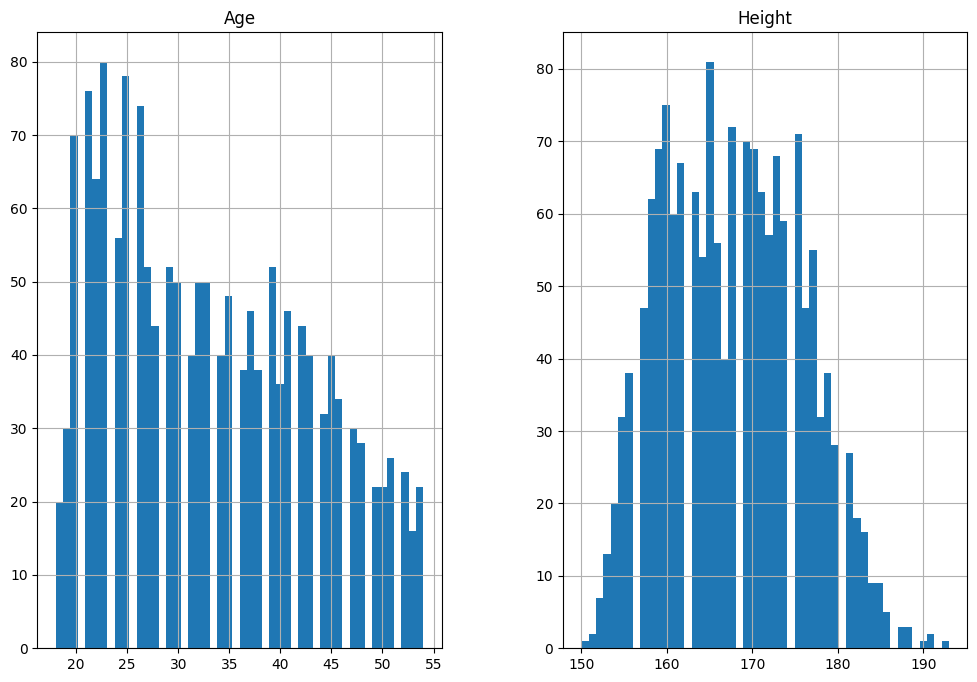

In [ ]:
import matplotlib.pylab as plt

data.hist(bins=50, figsize=(12,8))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns.difference(['Class'])
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
print(categorical_features)

Index(['Calculation_of_Calorie_Intake', 'Consumption_of_Fast_Food',
       'Food_Intake_Between_Meals', 'Frequency_of_Consuming_Vegetables',
       'Liquid_Intake_Daily', 'Number_of_Main_Meals_Daily',
       'Overweight_Obese_Family', 'Physical_Excercise',
       'Schedule_Dedicated_to_Technology', 'Sex', 'Smoking',
       'Type_of_Transportation_Used'],
      dtype='object')


In [ ]:
preprocessor = ColumnTransformer(
    transformers =[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [ ]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

---
### Task 3: USING DIFFERENT MODELS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=3)
logistic_regression_model.fit(X_train_scaled, y_train)

y_pred = logistic_regression_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

      Normal       0.82      0.86      0.84       146
     Obesity       0.63      0.69      0.66        48
  Overweight       0.73      0.69      0.71       109
 Underweight       0.79      0.58      0.67        19

    accuracy                           0.76       322
   macro avg       0.74      0.70      0.72       322
weighted avg       0.76      0.76      0.76       322



In [ ]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(random_state=3)
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring="accuracy", verbose=2)
grid_search_svm.fit(X_train_scaled, y_train)

best_svm_model = grid_search_svm.best_estimator_
print(f"Best Parameters: {grid_search_svm.best_params_}")

y_pred_svm = best_svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=scale

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=3)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring="accuracy", verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

y_pred_rf = best_rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_de

In [ ]:
# import joblib

# joblib.dump(best_rf_model, 'random_forest_model.pkl')

# joblib.dump(preprocessor, 'preprocessor.pkl')

In [ ]:
# from google.colab import files

# files.download('random_forest_model.pkl')
# files.download('preprocessor.pkl')